In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Experiment 1
### Part A

In [6]:
# s is network-wide throughput (Erlang) from data in exp1res.txt
e1pa_data = {'g': np.arange(0.5, 6.5, 0.5)/2, 
             'G': np.arange(0.5, 6.5, 0.5),
             's': [0.390444, 0.605449, 0.709360, 0.733570, 0.713810, 0.667884, 
                   0.607485, 0.540688, 0.472274, 0.413472, 0.350487, 0.297115 ]}
e1a_df = pd.DataFrame(e1pa_data)
e1a_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
g,0.250000,0.500000,0.75000,1.00000,1.25000,1.500000,1.750000,2.000000,2.250000,2.500000,2.750000,3.000000
G,0.500000,1.000000,1.50000,2.00000,2.50000,3.000000,3.500000,4.000000,4.500000,5.000000,5.500000,6.000000
s,0.390444,0.605449,0.70936,0.73357,0.71381,0.667884,0.607485,0.540688,0.472274,0.413472,0.350487,0.297115


### Part B: Experimental Results

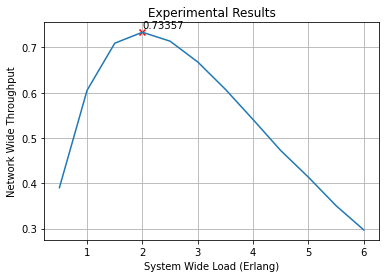

In [44]:
plt.plot(e1a_df.G.values, e1a_df.s.values)
plt.grid()
plt.title('Experimental Results')
plt.xlabel('System Wide Load (Erlang)')
plt.ylabel('Network Wide Throughput')

max_index = np.argmax(e1a_df.s.values)
max_x = e1a_df.G.values[max_index]
max_y = e1a_df.s.values[max_index]
plt.scatter(max_x, max_y, marker='x', color='red')
plt.text(max_x, max_y+0.01, f'{max_y}')
plt.show()

### Part C
The maximum throughput is 0.73357 and occurs at a System Wide Load of 2

### Part D: Theroretical Results

In [38]:
def s_equation(n, g):
    return (n*g*np.exp(-1*(n-1)*g))

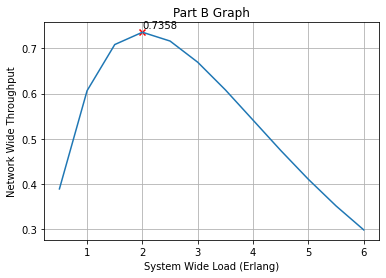

,0,1,2,3,4,5,6,7,8,9,10,11
g,0.250000,0.500000,0.75000,1.000000,1.250000,1.500000,1.750000,2.000000,2.250000,2.500000,2.750000,3.000000
G,0.500000,1.000000,1.50000,2.000000,2.500000,3.000000,3.500000,4.000000,4.500000,5.000000,5.500000,6.000000
experimental s,0.390444,0.605449,0.70936,0.733570,0.713810,0.667884,0.607485,0.540688,0.472274,0.413472,0.350487,0.297115
theoretical s,0.389400,0.606531,0.70855,0.735759,0.716262,0.669390,0.608209,0.541341,0.474297,0.410425,0.351603,0.298722


In [49]:
plt.plot(e1a_df.G.values, [s_equation(2, g) for g in e1a_df.g.values])
plt.grid()
plt.title('Part B Graph')
plt.xlabel('System Wide Load (Erlang)')
plt.ylabel('Network Wide Throughput')

max_index = np.argmax([s_equation(2, g) for g in e1a_df.g.values])
max_x = e1a_df.G.values[max_index]
max_y = [s_equation(2, g) for g in e1a_df.g.values][max_index]
plt.scatter(max_x, max_y, marker='x', color='red')
plt.text(max_x, max_y+0.01, f'{round(max_y, 4)}')
plt.show()

complete_df = {'g': np.arange(0.5, 6.5, 0.5)/2, 
             'G': np.arange(0.5, 6.5, 0.5),
             'experimental s': [0.390444, 0.605449, 0.709360, 0.733570, 0.713810, 0.667884, 
                   0.607485, 0.540688, 0.472274, 0.413472, 0.350487, 0.297115],
              'theoretical s': [s_equation(2, g) for g in e1a_df.g.values]}
e1_df = pd.DataFrame(complete_df)
e1_df.transpose()